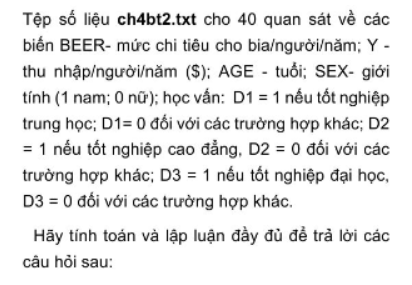

In [1]:
library(ggplot2)
library(lmtest)
library(urca)
library(sandwich)
library(car)
library(carData)
library(forecast)
library(tseries)
library(dummy)
library(seasonal)
library(hexView)
library(strucchange)
library(fBasics)

Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'urca' was built under R version 4.2.2"
Warning message:
"package 'sandwich' was built under R version 4.2.2"
Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"
Warning message:
"package 'forecast' was built under R version 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'tseries' was built under R version 4.2.2"
dummy 0.1.3

dummyNews()

Warning message:
"package 'seasonal' was built under R version 4.2.2"
Warning messag

In [3]:
df <- readEViews("ch4bt2.wf1")
df

Warning message in readEViews("ch4bt2.wf1"):
"Skipping boilerplate variable
"
Warning message in readEViews("ch4bt2.wf1"):
"Skipping boilerplate variable
"


Date,AGE,BE,D1,D2,D3,SEX,Y
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0001-01-01,25,109,0,0,0,1,15000
0002-01-01,45,0,0,0,0,1,30000
0003-01-01,20,0,0,0,0,1,12000
0004-01-01,28,108,0,0,0,1,20000
0005-01-01,25,220,1,0,0,1,15000
0006-01-01,35,189,1,0,0,1,30000
0007-01-01,40,64,1,0,0,1,12000
0008-01-01,22,262,1,0,0,1,12000
0009-01-01,30,64,1,0,0,1,28000


## Câu 1

Hãy ước lượng hàm tiêu dùng về bia phụ thuộc vào thu nhập, tuổi, giới tính, học vấn.

In [4]:
hq <- lm(data = df,BE~Y+AGE+SEX+D2+D3)
summary(hq)


Call:
lm(formula = BE ~ Y + AGE + SEX + D2 + D3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-206.330  -46.155    3.558   64.487  145.678 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.865e+02  5.792e+01   8.399 8.31e-10 ***
Y            2.852e-03  4.867e-04   5.860 1.31e-06 ***
AGE         -8.895e+00  1.699e+00  -5.236 8.48e-06 ***
SEX         -1.727e+02  2.933e+01  -5.888 1.20e-06 ***
D2          -5.718e+01  3.491e+01  -1.638   0.1107    
D3          -1.581e+02  6.001e+01  -2.634   0.0126 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 91.79 on 34 degrees of freedom
Multiple R-squared:  0.6977,	Adjusted R-squared:  0.6533 
F-statistic: 15.69 on 5 and 34 DF,  p-value: 5.205e-08


## Câu 2

Sử dụng kiểm đình F để xem có bỏ được D2 và D3 ra khỏi mô hình hay không? 

In [5]:
linearHypothesis(hq,c("D2=0","D3=0"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,36,351180.6,NA,NA,NA,NA
2,34,286465.5,2,64715.09,3.84045,0.0313481


Với mức ý nghĩa 5%, không thể bỏ D2 và D3 ra khỏi mô hình

## Câu 3

Ước lương lại mô hình và kiểm định xem dạng hàm có phù hợp không?

In [8]:
resettest(hq, power = c(2,3))


	RESET test

data:  hq
RESET = 2.2113, df1 = 2, df2 = 32, p-value = 0.126


Với mức ý nghĩa 5%, dạng hàm là phù hợp

## Câu 4

Phương sai của sai số có đồng đều không?

In [11]:
df$phandu <- resid(hq)
summary(lm(data = df, phandu ~ Y+AGE+I(Y^2)+I(AGE^2)+I(Y*AGE)))


Call:
lm(formula = phandu ~ Y + AGE + I(Y^2) + I(AGE^2) + I(Y * AGE), 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-219.957  -40.085    4.766   52.849  139.670 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -7.673e+01  1.707e+02  -0.450    0.656
Y            5.184e-03  3.550e-03   1.460    0.153
AGE         -4.052e-01  1.155e+01  -0.035    0.972
I(Y^2)      -1.323e-09  7.309e-09  -0.181    0.857
I(AGE^2)     5.059e-02  1.873e-01   0.270    0.789
I(Y * AGE)  -1.170e-04  1.046e-04  -1.118    0.271

Residual standard error: 86.96 on 34 degrees of freedom
Multiple R-squared:  0.1025,	Adjusted R-squared:  -0.02954 
F-statistic: 0.7762 on 5 and 34 DF,  p-value: 0.5737


Phương sai sai số đồng đều

## Câu 5

u có phân bố chuẩn? với mức ý nghãi 5%.

In [12]:
jarqueberaTest(hq$residuals)


Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 2.1716
  P VALUE:
    Asymptotic p Value: 0.3376 

Description:
 Sun Mar 12 17:45:00 2023 by user: Admin


Với mức ý nghĩa 5%, u có phân phối chuẩn

## Câu 6

Với các yếu khác như nhau, nam và nữ có tiêu dùng bia khác nhau không?  Vì sao. Mức khác nhau là bao nhiêu?

In [13]:
hq1 <- lm(data = df,BE~SEX)
summary(hq1)


Call:
lm(formula = BE ~ SEX, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-273.70 -101.90   -7.55   87.27  316.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   273.70      29.86   9.166 3.63e-11 ***
SEX          -164.30      42.23  -3.891  0.00039 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 133.5 on 38 degrees of freedom
Multiple R-squared:  0.2849,	Adjusted R-squared:  0.266 
F-statistic: 15.14 on 1 and 38 DF,  p-value: 0.0003902


Với các yếu khác như nhau, nam và nữ có tiêu dùng bia là khác nhau 

Vì sao hệ số của biến SEX có ý nghĩa. 

Nam chi tiêu cho bia ít hơn nữ -164.30 đơn vị

## Câu 7 

Một nữ, 28 tuổi, chưa tốt nghiệp trung học, có thu nhập trung bình/năm bằng 25000 \$/năm và một nam 30 tuổi, tốt nghiệp trung học, có thu nhập 27000\$/năm. Hãy dự báo khoảng tiêu dùng beer trung bình trong năm với hệ số tin cậy 95% của hai người này

In [16]:
n1 <- c(25000,28,0,0,0)
n2 <- c(27000,30,1,1,0)
predic1 <- predict(hq,data.frame(n1),interval="confidence",level=0.95)
predic1

ERROR: Error in eval(predvars, data, env): object 'Y' not found
